#  Aula 5 - Regressão (Atividade Prática)

**Objetivo:** 
*   Aprofundarmos no estudo de o que é um modelo de Regressão Linear, suas aplicações, funcionalidades e variações. 

**O que você será capaz de fazer após a aula:**
*   Entender como interpretar e utilizar as saídas que as bibliotecas do Python oferecem quando modelamos uma Regressão Linear.

## Dataset Diabetes

### Objetivos com a Regressão para este Dataset

1. Construir um modelo que **preveja** a resposta ***y*** a partir das variáveis $​​x_1, x_2, ..., x_{10}$. 
2.   Sugestão de quais **variáveis** ​​são fatores **importantes** na progressão da doença.
3.   Conseguir **previsões** de linha de base **precisas** de resposta para futuros pacientes. 

### Informações e carregando o Dataset

Este Dataset é composto por 10 variáveis explicativas de base: *idade (age), sexo (sex), índice de massa corporal (bmi), pressão arterial média (bp) e seis medições de soro sanguíneo (s1 a s6)* obtidas de *442 pacientes com diabetes* (n=442).

Nele também há uma *variável resposta (target)* que contém informações sobre a progressão da doença um ano após os exames da linha de base. Dado que uma pessoa não deixa de ser diabético, os valores desta variável indicam como a glicemia do paciente está. 
Por exemplo: pacientes que possuirem uma target abaixo de 100 significa que ele esta seguindo uma dieta, praticando exercícios... realizando tarefas para controlar o valor da sua glicemia. 
<br /> 
<br /> 

**OBSERVAÇÃO:**

Quando carregarmos a base ela virá com cada uma das 10 variáveis ​​explicativas centradas na média e dimensionadas pelo desvio padrão vezes a raiz quadrada de `n_amostras` (ou seja, a soma dos quadrados de cada coluna totalizará 1).

A seguir temos uma amostra do Dataset original, antes da transformação que pode ser encontrado neste [link](https://https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt).

| **PACIENTE** | **AGE** ($x_1$) | **SEX** ($x_2$) | **BMI** ($x_3$) | **BP** ($x_4$) | **S1** ($x_5$)| **S2** ($x_6$)| **S3** ($x_7$) | **S4** ($x_8$) | **S5** ($x_9$)| **S6** ($x_{10}$) |  **TARGET (Y)** |
|:------------:|:---------------:|:-------:|:-------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|       1      |        59       |    2    |   32.1  |   101  |   157  |  93.2  |   38   |    4   | 4.8598 |   87   |   151  |
|       2      |        48       |    1    |   21.6  |   87   |   183  |  103.2 |   70   |    3   | 3.8918 |   69   |   75   |
|       3      |        72       |    2    |   30.5  |   93   |   156  |  93.6  |   41   |    4   | 4.6728 |   85   |   141  |
|      ...     |    ...       |  ... |  ... | ... | ... | ... | ... | ... | ... | ... | ... |
|      441     |        23       |    1    |   22.6  |   89   |   139  |  64.8  |   61   |    2   | 4.1897 |   68   |   97   |
|      442     |        36       |    2    |    22   |   90   |   160  |  99.6  |   50   |    3   | 3.9512 |   82   |   138  |


* *Desafio: Porque você acredita que o Pyhton trás o dataset no formato transformado?*

In [10]:
# A biblioteca sklearn possui diversos datasets para treinos de diversos algoritmos de ML.
# Ha datasets pequenos e simulados apenas para aprendermos sobre o assunto, mas também contém
# bases com dados reais. Caso tenha curiosidade acesse: https://scikit-learn.org/stable/datasets.html
# Abaixo importamos os datasets que esta biblioteca possui.
from sklearn import datasets 

# A seguir carregamos o dataset intitulado "diabetes"
diabetes = datasets.load_diabetes()

print(diabetes.DESCR) # Esta linha de código nos dará um breve descrição e mais informações que 
                      # podemos obter sobre a base, assim como outros links referentes ao assunto  

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Como o Dataset vem, formato Bunch
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
import pandas as pd

# Transformando o Dataset em um dataframe para que fique mais fácil de trabalhar
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names) # Dando os nomes as colunas 
df['target'] = diabetes.target # Unindo a variável target ao dataset
df.head() # Ver um pedaço do dataset transformado em dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Análises Descritivas e Modelo

In [ ]:
# Use este espaço para realizar as análises descritivas que você 
# julgar relevantes para este banco de dados.

In [ ]:
# Crie aqui a linha de código, seja pela biblioteca scikit-learn 
# ou statsmodels, que irá modela uma regressão linear para a variável
# target com as demais variáveis explicativas.

##### Passo 1: Importar bibliotecas e pacotes necessários
##### Passo 2: Indicar para o programa quem são as var(s). explicativa(s) e quem são as var(s). resposta(s)
##### Passo 3: Indicar para o programa qual método de estimação e quem entrará no modelo
##### Passo 4: Imprimir e interpretar os resultados

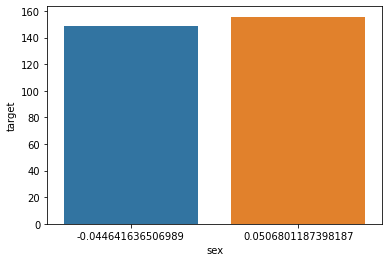

In [6]:


import numpy as np
import seaborn as sns
import matplotlib as mpl
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from datetime import datetime
from numpy import mean
from sklearn.linear_model import LinearRegression

sns.barplot(
y = 'target', 
x = 'sex',
data = df,
estimator = mean,
ci=None,
#color ='69b3a2'
)

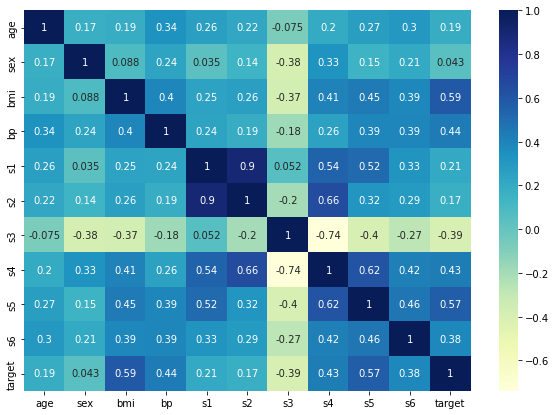

In [7]:

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

dataplot = sns.heatmap(df.corr(),
                      cmap = 'YlGnBu',
                      annot = True)

In [8]:
x_sklearn = df[['age','sex','bmi','bp',	's1',	's2',	's3','s4','s5','s6']] 
y_sklearn = df['target']

model_sklearn = LinearRegression().fit(x_sklearn, y_sklearn) # modelo linear e ajuste

## Resultados obtidos
r_sq = model_sklearn.score(x_sklearn, y_sklearn)
print(f"Coeficiente de determinação (R2): {r_sq}") # métrica de avaliação

print(f"Intercepto: {model_sklearn.intercept_}") 
print(f"Coeficientes: {model_sklearn.coef_}")

Coeficiente de determinação (R2): 0.5177494254132934
Intercepto: 152.1334841628965
Coeficientes: [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


Quais valores você encontrou para os coeficientes da regressão? Como você os interpreta? 



O valor e R2 encontrado foi de 0.5172, ou seja, aproximadamente 0,52 ou 52% da amostra é  representada pelo modelo proposto.

*   Intercepto: é o valor previsto de uma variável dependente = 152.1334841628965;
*   x1 a x10: são as variáveis independentes;
*   β1 a β10: são os coeficientes de regressão respectivamente = -10.01219782, -239.81908937,519.83978679, 324.39042769, -792.18416163, 476.74583782, 101.04457032, 177.06417623, 751.27932109, 67.62538639.



### Previsões

Vamos supor que queremos prever o índice glicêmico considerando so dados de entrada:


*   age = 0.001882 (ou seja,  x1  = 0.001882)
*   sex = 0.050680 (ou seja,  x2  = 0.050680)
*   bmi = -0.011595 (ou seja,  x3  = -0.011595)
*   bp = -0.005671 (ou seja,  x4  = -0.005671)
*   s1 = 0.012191 (ou seja,  x5  = 0.012191)
*   s2 = -0.019163 (ou seja,  x6  = -0.019163)
*   s3 = -0.032356 (ou seja,  x7  = -0.032356)
*   s4 = -0.039493 (ou seja,  x8  = -0.039493)
*   s5 = 0.022692 (ou seja,  x9  = 0.022692)
*   s6 = -0.092204 (ou seja,  x10  = -0.092204)





In [9]:
# Crie aqui a linha de código, seja pela biblioteca scikit-learn 
# ou statsmodels, que irá realizar a predição da variável target
# para quaisquer valores de sua escolha para as variáveis explicativas
# utilizando o modelo construído anteriormente. 

import warnings
warnings.filterwarnings("ignore")

#Sklearn
y_pred_sklearn = model_sklearn.predict([[0.001882,0.050680,-0.011595,-0.005671,0.012191,
                                          -0.019163,-0.032356,-0.039493,0.022692,-0.092204]]) #predições do modelo

print(f"Valor predito Sklearn: {y_pred_sklearn}")


Valor predito Sklearn: [113.85055731]


Como você interpreta os resultados da sua previsão?

* Sendo assim o valor previsto/estimado para o indície glicêmico para os parâmetros de entradas é de 147.48, pois: o Índice_glicêmico = 152.1335 + (-10.0122 x 0.001882) + (-239.8191 x 0.050680) + (519.8398 x -0.011595) + (324.3904 x 0.005671) + (-792.18412 x -0.012191) + (476.7458 x -0.019163) + (101.0446 x -0.032356) +(177.0642 x -0.039493) + (751.2793 x 0.022692) + (67.6254 x -0.092204) = 113.85055731